<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Exploring SVMs Using Sklearn


---

In [17]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score, GridSearchCV

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the handwritten digits dataset.

In [2]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

1797
64


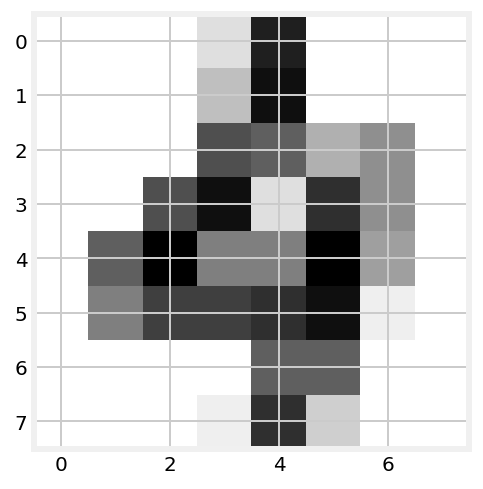

In [3]:
print(len(digits.data))      # 1,797 observations
print(len(digits.data[0]))   # 8 x 8 pixel image

# some number
plt.imshow(digits.images[-20], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
digits.target[-20]

4

### 2. Cross-validate a logistic regression on the data.

In [6]:
# A:
lr = LogisticRegression()
cross_val_score(lr, digits.data, digits.target).mean()

/Users/Noah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Noah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

0.9137650882079852

### 3. Cross-validate a SVM on the data.

Hint: Check what is the default kernel used. Try some of the alternatives.

In [18]:
clf = svm.SVC()

In [28]:
# A:
cross_val_score(clf, digits.data, digits.target).mean()

0.9632838130609718

## Gaussian SVM has two parameters, gamma and C

---

### gamma

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 

The higher the value of gamma, the more it will try to exactly fit the training data set. That will cause over-fitting problems.
- Small gamma: The model is constrained and can under-fit!  It has high bias and low variance.
- Large gamma: The model tries to capture the shape too well: it can over-fit!  It has low bias and high variance.



### C

`C` is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. `C` can be thought of as the parameter for the soft margin cost function, which controls the influence of each individual support vector.

- Small C: makes the decision surface smooth and simple, a softer margin can under-fit! Gives high bias and low variance.
- Large C: selects more support vectors: can over-fit! Gives a harder margin, low bias and high variance.

### 4. Fit an SVM modifying the default gamma and C.

In [29]:
# A:
clf_params = [{'C':np.logspace(-4,4,10),
              'gamma':['scale', 'auto']}]
gs = GridSearchCV(clf, clf_params, verbose=1)
gs.fit(digits.data, digits.target)
print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 21.54434690031882, 'gamma': 'scale'}
0.9738502011761063


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.1s finished


### 5. Gridsearch an optimal gamma with C=1.

In [48]:
# A:


### 6. Gridsearch the optimal C, gamma, and kernel.

In [23]:
# A:
clf_params = [{'C':np.logspace(-4,4,10),
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma':['scale', 'auto']}]
gs = GridSearchCV(clf, clf_params, verbose=1)
gs.fit(digits.data, digits.target)
print(gs.best_params_)
print(gs.best_score_)

{'C': 21.54434690031882, 'gamma': 'scale', 'kernel': 'rbf'}
0.9738502011761063


<font color = red>
GridSearch tends to take much too long if you tune for all parameters inc: kernal. Unecessary as some kernels don't use some of the other params... better in that case to have separate GridSearch's for each kernal and compare their scores

### 7. Import the iris dataset.

In [24]:
iris = datasets.load_iris()
iris_X = iris.data[:, :2]  # we only take the first two features. 
iris_y = iris.target

### 8. Cross-validate a default logistic regression and default SVM on the iris data.

In [27]:
# A:
lr = LogisticRegression()
print('LR CV', cross_val_score(lr, iris.data, iris.target).mean())
clf = svm.SVC()
print('SVC CV', cross_val_score(clf, iris.data, iris.target).mean())

LR CV 0.9733333333333334
SVC CV 0.9666666666666666


/Users/Noah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 9. [Bonus] Compare three SVMs with different kernels on the iris data visually.
- Gaussian
- Linear
- Poly of degree 3

Hint: For visual comparison, use only two of the iris features, e.g. sepal length and sepal width.

- Work through the code below and try to understand how the plot is created.
- Interpreted the results of the different kernels.

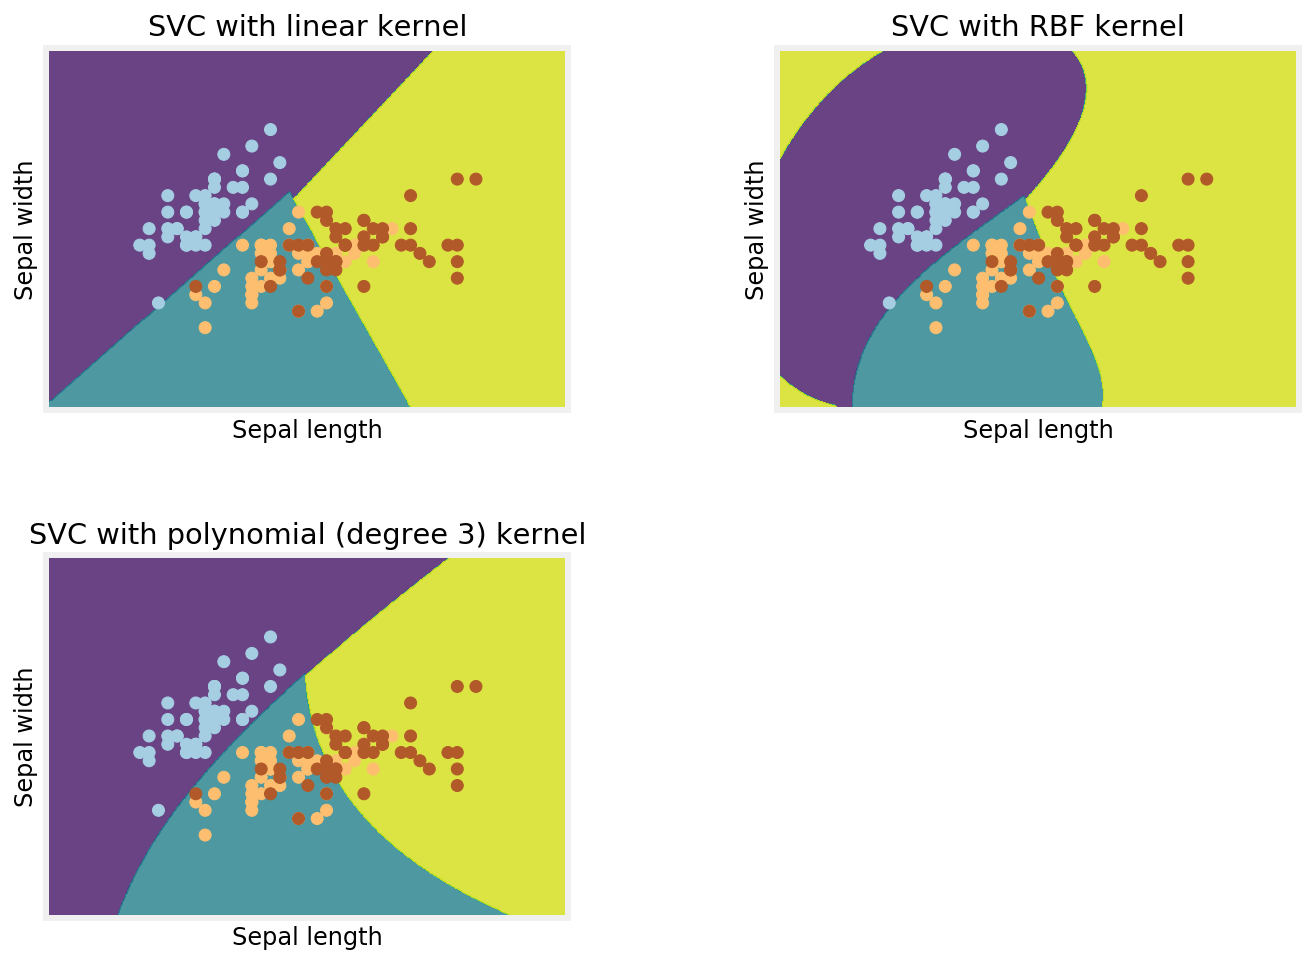

In [55]:
# A:
iris_X = iris.data[:, :2]
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(
    iris_X, iris_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(iris_X, iris_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C,
                   gamma='scale').fit(iris_X, iris_y)

# create a mesh to plot in
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                     np.arange(y_min, y_max, .01))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(10, 8))
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel flattens xx and yy, and np.c_ concatenates into co-ords
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    # Plot also the training points
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

### 10. [Bonus] Compare SVM kernels visually on generated data using sklearn's `make_circles`.

Load `make_circles` from here:
```python
from sklearn.datasets import make_circles
```

Compare the linear, rbf, and poly kernels.

In [30]:
# A:
from sklearn.datasets import make_circles

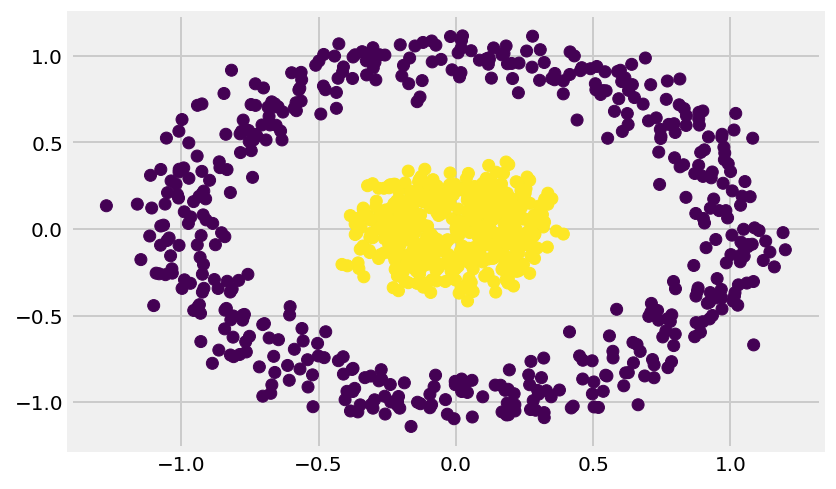

In [54]:
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0],circles_X[:,1],c=circles_y);

0.489


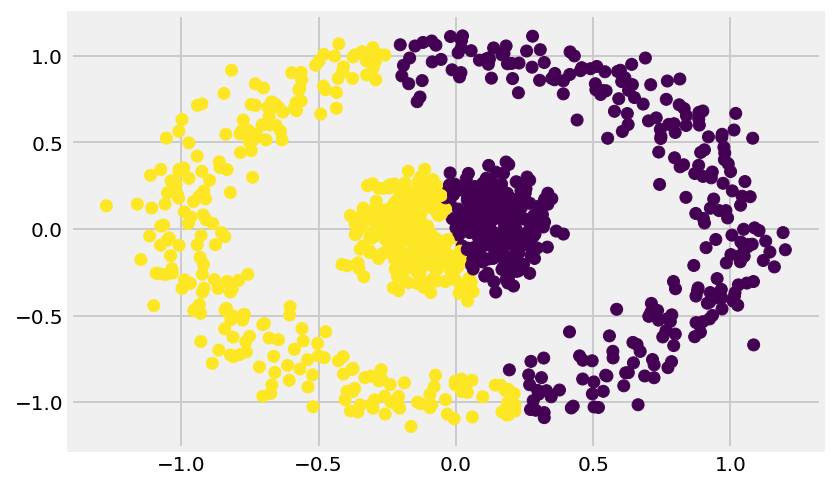

In [37]:
lr = LogisticRegression()
print(cross_val_score(lr, circles_X, circles_y).mean())
lr.fit(circles_X,circles_y)
plt.scatter(circles_X[:,0],circles_X[:,1],c=lr.predict(circles_X));

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    2.3s finished


{'C': 1}
0.6650063236889584


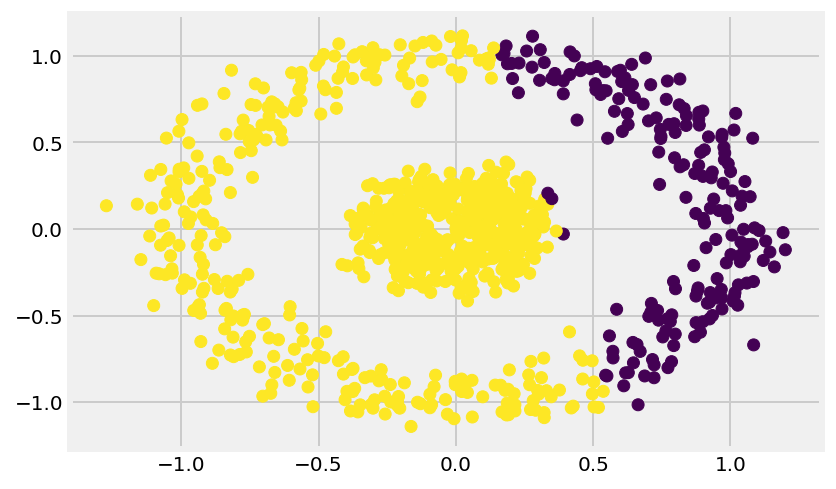

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 498 tasks      | elapsed:    7.8s
[Parallel(n_jobs=2)]: Done 900 out of 900 | elapsed:   17.0s finished


{'C': 1, 'coef0': 2, 'degree': 2, 'gamma': 0.3593813663804626}
1.0


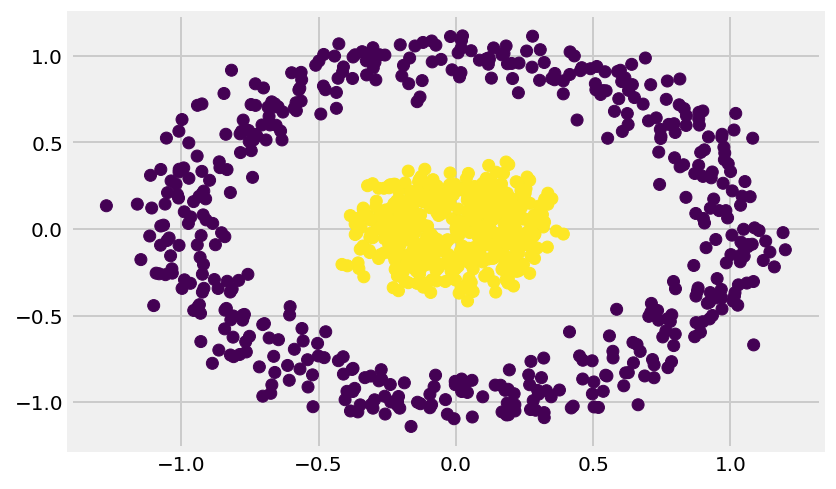

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.4s finished


{'C': 1, 'gamma': 0.3593813663804626}
1.0


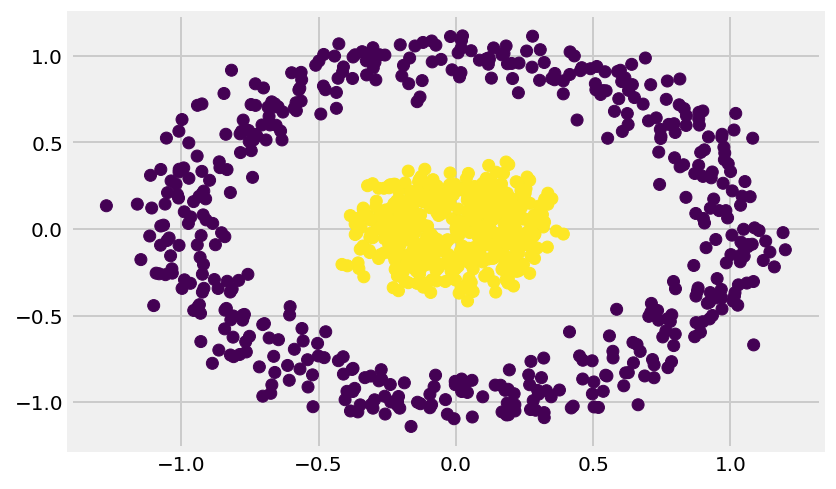

In [51]:
clf = [svm.SVC(kernel='linear'),
       svm.SVC(kernel='poly'),
       svm.SVC(kernel='rbf')]
clf_params = [{'C':[1]},
              {'C':[1],
               'coef0':[2,3,4],
               'degree':list(range(10)),
               'gamma':np.logspace(-4,4,10)},
              {'C':[1],
               'gamma':np.logspace(-4,4,10)}]

gs = {}
for i in range(len(clf)):
    gs = GridSearchCV(clf[i], clf_params[i], verbose=1, n_jobs=2, cv=3)
    gs.fit(circles_X,circles_y)
    print(gs.best_params_)
    print(gs.best_score_)
    plt.scatter(circles_X[:,0],circles_X[:,1],c=gs.predict(circles_X))
    plt.show();